## KNN classifier with simple dataset

In [36]:
# KNN Classifier - Breast Cancer
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

In [37]:
df = pd.read_csv('../dataset/Breast Cancer Wisconsin (Diagnostic) Data Set/breast-cancer-wisconsin.data', header=None)
df.columns = ['ID_Number', 'Clump_Thickness', 'Unif_Cell_Size', 'Unif_Cell_Shape', 'Marg_Adhesion', 'Single_Epith_Cell_Size',
             'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

In [38]:
df.head()

,ID_Number,Clump_Thickness,Unif_Cell_Size,Unif_Cell_Shape,Marg_Adhesion,Single_Epith_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [39]:
df.nunique()

ID_Number                 645
Clump_Thickness            10
Unif_Cell_Size             10
Unif_Cell_Shape            10
Marg_Adhesion              10
Single_Epith_Cell_Size     10
Bare_Nuclei                11
Bland_Chromatin            10
Normal_Nucleoli            10
Mitoses                     9
Class                       2
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID_Number                 699 non-null int64
Clump_Thickness           699 non-null int64
Unif_Cell_Size            699 non-null int64
Unif_Cell_Shape           699 non-null int64
Marg_Adhesion             699 non-null int64
Single_Epith_Cell_Size    699 non-null int64
Bare_Nuclei               699 non-null object
Bland_Chromatin           699 non-null int64
Normal_Nucleoli           699 non-null int64
Mitoses                   699 non-null int64
Class                     699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [41]:
df['Bare_Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [42]:
df['Bare_Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

Let's fix the 16 "?" nan value

In [43]:
df['Bare_Nuclei'].describe()

count     699
unique     11
top         1
freq      402
Name: Bare_Nuclei, dtype: object

In [44]:
# Replace with the most frequent value which is 1
df['Bare_Nuclei'] = df['Bare_Nuclei'].replace('?', np.NAN)
df['Bare_Nuclei'] = df['Bare_Nuclei'].fillna(df['Bare_Nuclei'].value_counts().index[0])

In [45]:
df['Class'].unique()

array([2, 4], dtype=int64)

In [46]:
# Let's convert the classes to a 0 and 1 indicator for using in the classifier
df['Cancer_Ind'] = 0
df.loc[df['Class'] == 4, 'Cancer_Ind'] = 1

In [48]:
# Dropping irrevelant columns
X = df.drop(['ID_Number', 'Class', 'Cancer_Ind'], axis=1)
y = df['Cancer_Ind']

In [57]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler()
X_std = X_std.fit_transform(X)

KNN is very sensitive to distances, thus we need to standardizing all the columns before applying the algorithms

In [62]:
from sklearn.model_selection import train_test_split
X_std_df = pd.DataFrame(X_std, index=X.index, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_std_df, y, test_size=0.3, random_state=42)

KNN classifier is being applied with a neighbor value of 3 and p value indicates it is 2-norm, also known as Euclidean distance for computing classes

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn_fit = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')
knn_fit.fit(X_train, y_train)

knn_pred = knn_fit.predict(X_train)
print('\nK-Nearest Neighbors - Train Confusion Matrix\n\n', pd.crosstab(y_train, knn_pred,
                                                                       rownames=['Actuall'], colnames=['Predicted']), sep='')
print('\nK-Nearest Neighbors - Train accuracy', round(accuracy_score(y_train, knn_pred), 3))
print('\nK-Nearest Neighbors - Train Classification Report\n', classification_report(y_train, knn_pred))

knn_pred = knn_fit.predict(X_test)
print('\nK-Nearest Neighbors - Test Confusion Matrix\n\n', pd.crosstab(y_test, knn_pred,
                                                                       rownames=['Actuall'], colnames=['Predicted']), sep='')
print('\nK-Nearest Neighbors - Test accuracy', round(accuracy_score(y_test, knn_pred), 3))
print('\nK-Nearest Neighbors - Test Classification Report\n', classification_report(y_test, knn_pred))


K-Nearest Neighbors - Train Confusion Matrix

Predicted    0    1
Actuall            
0          309    6
1            4  170

K-Nearest Neighbors - Train accuracy 0.98

K-Nearest Neighbors - Train Classification Report
              precision    recall  f1-score   support

          0       0.99      0.98      0.98       315
          1       0.97      0.98      0.97       174

avg / total       0.98      0.98      0.98       489


K-Nearest Neighbors - Test Confusion Matrix

Predicted    0   1
Actuall           
0          141   2
1            3  64

K-Nearest Neighbors - Test accuracy 0.976

K-Nearest Neighbors - Test Classification Report
              precision    recall  f1-score   support

          0       0.98      0.99      0.98       143
          1       0.97      0.96      0.96        67

avg / total       0.98      0.98      0.98       210



From the results, it is appearing that KNN is working very well in classifying malignant
and benign classes well, obtaining test accuracy of 97.6 percent with 96 percent of recall on
malignant class. The only deficiency of KNN classifier would be, it is computationally
intensive during test phase, as each test observation will be compared with all the available
observations in train data, which practically KNN does not learn a thing from training data.
Hence, we are also calling it a lazy classifier!

## Tuning of k-value in KNN classifier

In [74]:
# Tuning of K-value for train & test data
dummyarray = np.empty((5, 3))
k_valchart = pd.DataFrame(dummyarray)
k_valchart.columns = ["K_value", "Train_acc", "Test_acc"]

k_vals = [1, 2, 3, 4, 5]

for i in range(len(k_vals)):
    knn_fit = KNeighborsClassifier(n_neighbors=k_vals[i], p=2, metric='minkowski')
    knn_fit.fit(X_train, y_train)
    
    print('\nK-value', k_vals[i])
    
    knn_pred = knn_fit.predict(X_train)
    tr_accscore = round(accuracy_score(y_train, knn_pred), 3)
    print('\nK-Nearest Neighbors - Train Confusion Matrix\n\n', pd.crosstab(y_train, knn_pred,
                                                                           rownames=['Actuall'], colnames=['Predicted']), sep='')
    print('\nK-Nearest Neigighbors - Train accuracy:', tr_accscore)
    print('\nK-Nearest Neighbors - Train Classification Report\n', classification_report(y_train, knn_pred))
    
    knn_pred = knn_fit.predict(X_test)
    ts_accscore = round(accuracy_score(y_test, knn_pred), 3)
    print('\nK-Nearest Neighbors - Test Confusion Matrix\n\n', pd.crosstab(y_test, knn_pred,
                                                                           rownames=['Actuall'], colnames=['Predicted']), sep='')
    print('\nK-Nearest Neigighbors - Test accuracy:', ts_accscore)
    print('\nK-Nearest Neighbors - Test Classification Report\n', classification_report(y_test, knn_pred))
    k_valchart.loc[i, 'K_value'] = k_vals[i]
    k_valchart.loc[i, 'Train_acc'] = tr_accscore
    k_valchart.loc[i, 'Test_acc'] = ts_accscore


K-value 1

K-Nearest Neighbors - Train Confusion Matrix

Predicted    0    1
Actuall            
0          315    0
1            0  174

K-Nearest Neigighbors - Train accuracy: 1.0

K-Nearest Neighbors - Train Classification Report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       315
          1       1.00      1.00      1.00       174

avg / total       1.00      1.00      1.00       489


K-Nearest Neighbors - Test Confusion Matrix

Predicted    0   1
Actuall           
0          141   2
1            7  60

K-Nearest Neigighbors - Test accuracy: 0.957

K-Nearest Neighbors - Test Classification Report
              precision    recall  f1-score   support

          0       0.95      0.99      0.97       143
          1       0.97      0.90      0.93        67

avg / total       0.96      0.96      0.96       210


K-value 2

K-Nearest Neighbors - Train Confusion Matrix

Predicted    0    1
Actuall            
0          315    

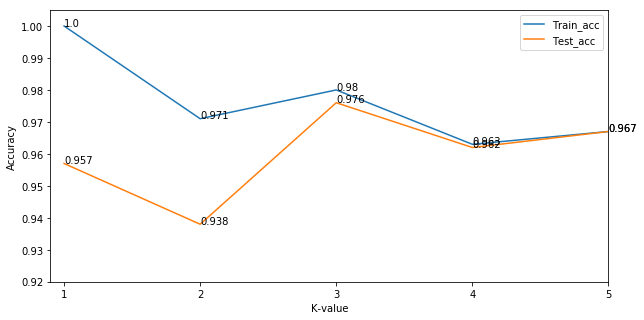

In [92]:
# Plotting accuracies over varied k-values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.plot(k_valchart['K_value'], k_valchart['Train_acc'])
plt.plot(k_valchart['K_value'], k_valchart['Test_acc'])

plt.axis([0.9, 5, 0.92, 1.005])
plt.xticks([1, 2, 3, 4, 5])

for a, b in zip(k_valchart['K_value'], k_valchart['Train_acc']):
    plt.text(a, b, str(b), fontsize=10)
    
for a, b in zip(k_valchart['K_value'], k_valchart['Test_acc']):
    plt.text(a, b, str(b), fontsize=10)
plt.legend(loc='upper right')
plt.show()

Change in accuracies in different K-values in KNN classifier

It appears that with less value of k-value, it has more overfitting problems due to the very
high value of accuracy on train data and less on test data, with the increase in k-value more
the train and test accuracies are converging and becoming more robust. This phenomenon
illustrates the typical machine learning phenomenon

In [89]:
k_valchart[:3]

,K_value,Train_acc,Test_acc
0,1.0,1.000,0.957
1,2.0,0.971,0.938
2,3.0,0.980,0.976


In [ ]:
# References and credits to
# Statistics for Machine Learning
# dataset from: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29